# Import

In [ ]:
import numpy as np
import scipy.integrate as integ
import scipy.interpolate as i2
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from astropy import units as u
from astropy import constants as c

import shootingres as shr

import scipy.optimize as o
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
sns.set_palette("colorblind")

import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
import scienceplots
plt.style.use('science')

f = 16

In [3]:
## SET CONSTANTS
rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
mu_0 = 1.2566*10**(-6)

# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1

In [4]:
r1 = 0.1
r2 = 5
reso = 500
r = np.arange(1, 5, 24/reso)
q_mag = 1
guess = 0.39760350887860546+0.02203028300281025j
VA_N = 0.578*8/10
# VA_N = 0.30848

B0 = 0
Bz = VA_N*r1*Omega0*np.sqrt(rho*mu_0)*10000
# VA_N = 30/(r1*Omega0*np.sqrt(rho*mu_0)*10000)
print(VA_N)
print(Bz)
kn = 1
m = 1
k = kn*np.pi/(4)

## NOTE VA_N ~ 30G
# Define Normalizations
r1 = 0.1



0.4624
29.978811690584404


# Exp6 Scan

In [6]:
dt = 1
eta_arr = np.arange(dt, 150, dt)
e = []
f1 = []
diff_modes = ['MCI_1k1', 'MCI_2k1', 'MRI_2k1']
# diff_modes = ['MCI_1k1', 'MCI_2k1', 'MRI_1k1']
# diff_modes = ['MCI_2k1', 'MRI_2k1']


# diff_modes = ['MRI_1k1', 'MRI_2k1'] 
# diff_modes = ['MRI_1k1'] 

for k in range(0,len(diff_modes)):
    d = []
    d1 = []

    if(diff_modes[k] == 'MCI_1k1'):
        eta_arr = np.arange(1, 100, 1)
    elif(diff_modes[k] == 'MCI_2k1'):
        eta_arr = np.arange(1, 100, 1)
    elif(diff_modes[k] == 'MRI_1k1'):
        eta_arr = np.arange(1, 10, 1)
    elif(diff_modes[k] == 'MRI_2k1'):
        eta_arr = np.arange(1, 23, 1)
    n = 0
    for j in eta_arr:
        elecd_str = f'{j}'
    
        guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesu_' + elecd_str + '-Exp6-q2pi.pkl'
        guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesd_' + elecd_str + '-Exp6-q2pi.pkl'
        VA_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANUP_' + elecd_str + '-Exp6-q2pi.pkl'
        VA_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANDOWN_' + elecd_str + '-Exp6-q2pi.pkl'
    
        with open(guesses_str_d, 'rb') as f:
            guesses_1k1_MCI_l = pickle.load(f)    
        with open(guesses_str_u, 'rb') as f:
            guesses_1k1_MCI_h = pickle.load(f)    
        
        with open(VA_d, 'rb') as f:
            VA_l_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)    
        with open(VA_u, 'rb') as f:
            VA_h_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)   
            
        gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4= []
        gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
        for j in range(0,len(guesses_1k1_MCI_l)):
            gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].imag)
        for j in range(0,len(guesses_1k1_MCI_h) ):
            gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].imag)    
        freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4 = []
        freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
        for j in range(0,len(guesses_1k1_MCI_l)):
            freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].real)
            
        for j in range(0,len(guesses_1k1_MCI_h)):
            freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].real)
        
        e12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        f12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        VA12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        e12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        f12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        VA12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(VA_l_MCI1_Bz_ETA1_divr_WKB_div4[:])
        e12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[1:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)]
        f12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[1:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)]
        VA12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = VA_h_MCI1_Bz_ETA1_divr_WKB_div4[1:len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)]
    
        VA_N_total = VA12
        gr_tot = e12
        n = n + 1

        d.append(gr_tot)
        d1.append(f12)
    e.append(d)
    f1.append(d1)
    
eta_arr = np.arange(1, 150, 1)
e11 = np.zeros((len(gr_tot), len(eta_arr), len(diff_modes)))
f11 = np.zeros((len(gr_tot), len(eta_arr), len(diff_modes)))
print(np.shape(e11))
for k in range(0,len(diff_modes)):
    len_eta = len(e[k])
    for j in range(0,len_eta):
        # print(len(e[k][j]))
        e11[0:len(e[k][j]),j,k] = e[k][j][:]
        f11[0:len(f1[k][j]),j,k] = f1[k][j][:]

(1602, 149, 3)


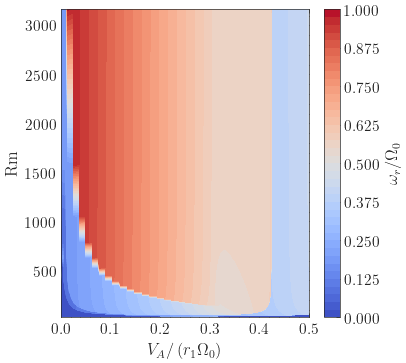

In [7]:
e11_ii = np.where(e11 <= 0)
e11[e11_ii[:]] = 0

### Take slices of maximum gr at given freq:
gr_ijk = np.zeros((1602, len(eta_arr)))
gr_ijk_ii = np.zeros((1602, len(eta_arr)))
freq_ijk = np.zeros((1602, len(eta_arr)))
for i in range(0,np.shape(e11)[0]):
    for j in range(0,np.shape(e11)[1]):
        for k in range(0,np.shape(e11)[2]):
            # gr_ijk[i,j] = e11[i,j,k]
            if(e11[i,j,k] > gr_ijk[i,j]):
                # gr_ijk[i,j] = e11[i,j,k]
                gr_ijk_ii[i,j] = k+1
                freq_ijk[i,j] = f11[i,j,k]
                if(freq_ijk[i,j] < 0.001):
                    freq_ijk[i,j] = 0
                # print(diff_modes[k])
                # print(k)
            
Rm = r1**2*Omega0/eta_arr

fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
fig.set_figheight(4)
fig.set_figwidth(4)

plt.contourf(VA_N_total, Rm, np.transpose((freq_ijk)),40, cmap ='coolwarm')
plt.ylabel(r'Rm')
plt.xlabel(r'$V_A/\left(r_1\Omega_0\right)$')
# Add a colorbar
cbar = plt.colorbar()
# Add a label to the colorbar
cbar.set_label(r'$\omega_r/\Omega_0$')
# plt.title(r'Dominant Mode at fixed Rm and $V_A$')
plt.xlim(0,0.5)
# plt.savefig('Rm-vA-Kep-3r1-freq-qmagpi.png', dpi = 400)
# plt.savefig('Rm-vA-Kep-3r1-freq-qmagpi.svg', format = 'svg')
plt.show()


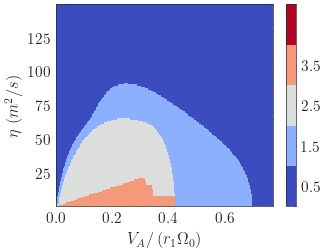

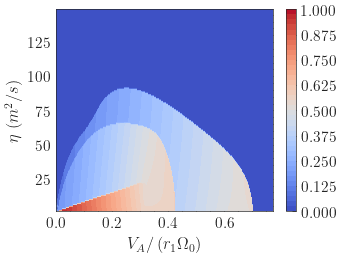

In [8]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
gr_ijk_ii_plot = np.transpose(gr_ijk_ii)

nticks = len(diff_modes) 
levels_arr = np.zeros(len(diff_modes)+1)
ticks_arr = np.zeros(len(diff_modes)+1)
for j in range(0, len(diff_modes)+1):
    ticks_arr[j] = j
    levels_arr[j] = j


ticks_arr = ticks_arr +0.5
levels = [0,1,2,3,4,5]
cmap = plt.colormaps['coolwarm']
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.figure()
contour = plt.pcolormesh(VA_N_total, eta_arr, gr_ijk_ii_plot, cmap=cmap, norm=norm)
# plt.contourf(VA_N_total, eta_arr, gr_ijk_ii_plot)
# cbar = plt.colorbar(im, ax=ax0)
cbar = plt.colorbar(contour,  ticks=ticks_arr)
# cbar.ax.set_yticklabels(['No Mode', r'MCI $1k_1$', r'MCI $2k_1$', r'MRI $1k_1$', r'MRI $2k_1$'])
# cbar.ax.set_yticklabels(['No Mode', r'MCI $1k_1$', r'MCI $2k_1$', r'MRI $1k_1$'])

plt.ylabel(r'$\eta$  $(m^2/s)$')
plt.xlabel(r'$V_A/\left(r_1\Omega_0\right)$')
plt.show()

plt.figure()
contour = plt.contourf(VA_N_total, eta_arr, np.transpose(freq_ijk), 40, cmap ='coolwarm')
cbar = plt.colorbar(contour)
plt.ylabel(r'$\eta$  $(m^2/s)$')
plt.xlabel(r'$V_A/\left(r_1\Omega_0\right)$')
plt.show()

In [9]:
j_mark = 0
k_mark = 0
gr_ii = np.where(gr_ijk_ii_plot == 1)
# print(gr_ii)
# print(np.where(gr_ii[0] == np.max(gr_ii[0])))
# print(gr_ii)

VA_N_total[gr_ii[1][:]]
# print(eta_arr[gr_ii[0][:]])
print(np.max((eta_arr[gr_ii[0][:]])))
jj = np.where(eta_arr[gr_ii[0][:]] == np.max(eta_arr[gr_ii[0][:]]))
# print(jj)
kk = VA_N_total[gr_ii[1][:]][jj[:]]
# print(kk)
# VAm = VA_N_total[jj[:]][0]
# VAm = VA_N_total[gr_ii[1][:]][jj[:]][0]
# VAm = VA_N_total[jj[:]][0]
VAm = kk[0]
print(VAm)
Rmm = r1**2*Omega0/np.max((eta_arr[gr_ii[0][:]]))
print(f'Minimum Rm: {Rmm}')

91
0.2448266600380985
Minimum Rm: 34.75030395789428


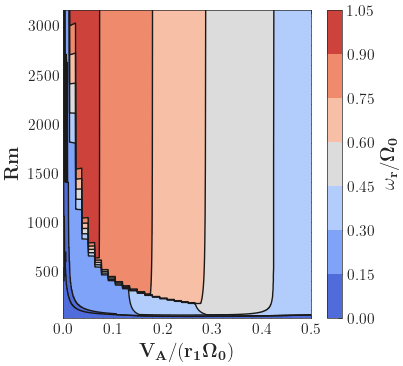

In [10]:
################ Zoom
cmap = 'coolwarm'
fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
ax2.set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2.set_ylabel(r'\textbf{Rm}', fontsize = 14)

fig.set_figheight(4)
fig.set_figwidth(4)


contour = plt.contourf(VA_N_total, Rm, np.transpose((freq_ijk)), 7, cmap=cmap)
cbar = plt.colorbar()
cbar.set_label(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 14)
plt.contour(contour, colors='k')

lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=2, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1)
plt.xlim(0, 0.5)
# plt.savefig('Rm-vA-Kep-3r1-freq-qmagpi.png', dpi = 400)
# plt.savefig('Rm-vA-Kep-3r1-freq-qmagpi.svg', format = 'svg')
plt.show()

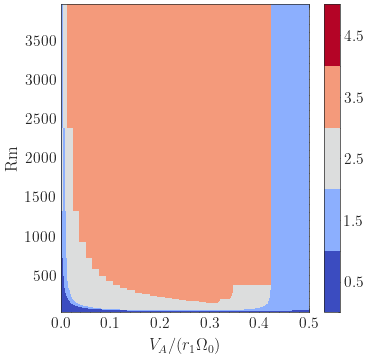

In [11]:
################ Zoom
# import seaborn
# seaborn.set_theme()
cmap = 'coolwarm'
fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
fig.set_figheight(4)
fig.set_figwidth(4)

levels = [0,1,2,3,4,5,6,7,8]

contour = plt.pcolormesh(VA_N_total, Rm, gr_ijk_ii_plot, cmap=cmap, norm=norm, rasterized=True)
tickss = np.array([0,1,2,3,4])+ 0.5
cbar = plt.colorbar(contour,  ticks=tickss) 
# cbar.ax.set_yticklabels(['No Mode', r'MCI $1k_1$', r'MCI $2k_1$', r'MRI $1k_1$', r'MRI $2k_1$'])
lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=2, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1)
# plt.ylim(np.min(Rm), 250)
plt.xlim(0, 0.5)
# plt.savefig('Rm-vA-Kep-3r1-dommode-qmagpi-zoom.png', dpi = 400)
# plt.savefig('Rm-vA-Kep-3r1-dommode-qmagpi-zoom.svg', format = 'svg', dpi =300)
# plt.savefig('Rm-vA-Kep-dommode-qmagpi-zoom.pdf')

plt.show()

0.2448266600380985


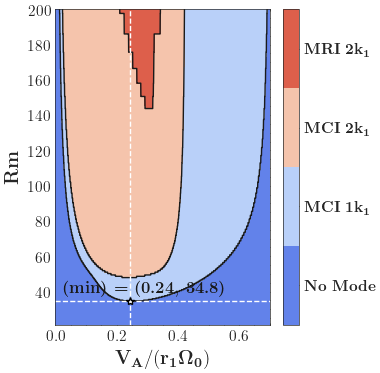

In [12]:
################ Zoom
# import seaborn
# seaborn.set_theme()
cmap = 'coolwarm'
fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
ax2.set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2.set_ylabel(r'\textbf{Rm}', fontsize = 14)
fig.set_figheight(4)
fig.set_figwidth(4)

levels = [0,1,2,3,4,5,6,7,8]

# contour = plt.pcolormesh(VA_N_total, Rm, gr_ijk_ii_plot, cmap=cmap, norm=norm, rasterized=True)
levels =np.array([0,1,2,3,4])
contour = plt.contourf(VA_N_total, Rm, gr_ijk_ii_plot+1., cmap=cmap, levels = levels)
plt.contour(contour, colors='k')

tickss = np.array([0,1,2,3])+ 0.5
cbar = plt.colorbar(contour,  ticks=tickss) 
cbar.ax.set_yticklabels([r'\textbf{No Mode}', r'\textbf{MCI} $\mathbf{1k_1}$', r'\textbf{MCI} $\mathbf{2k_1}$', r'\textbf{MRI} $\mathbf{2k_1}$'])
plt.axvline(x = VAm, color = 'w', linestyle = 'dashed')
plt.axhline(y = Rmm, color = 'w', linestyle = 'dashed')
plt.plot(VAm, Rmm, color = 'w', marker = '*', markeredgecolor='black')
# plt.text(VAm + 0.02, Rmm+5, f'(min) = {(np.round(VAm,1), np.round(Rmm, 1))}', fontsize=12, color='w', fontweight='bold')
plt.text(VAm - 0.22, Rmm+5, r'\textbf{(min) = (0.24, 34.8)}', fontsize=12, color='k', fontweight='bold')
print(VAm)
lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=2, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1)
plt.ylim(np.min(Rm), 200)
plt.xlim(0, 0.7)
plt.tight_layout()
# plt.savefig('Rm-vA-Kep-3r1-dommode-qmagpi-zoom.png', dpi = 400)
# plt.savefig('Rm-vA-Kep-3r1-dommode-qmagpi-zoom.svg', format = 'svg', dpi =300)
# plt.savefig('Rm-vA-Kep-dommode-qmagpi-zoom.pdf')
plt.savefig('Rm-vA-Exp3-dommode-qmagpi-zoom-qrcomp.pdf')

plt.show()

# Kep Scan 

In [13]:
dt = 1
eta_arr = np.arange(dt, 150, dt)
e = []
f1 = []
diff_modes = ['MCI_1k1', 'MCI_2k1',  'MRI_2k1']
# diff_modes = ['MRI_1k1','MRI_2k1']

# diff_modes = ['MRI_1k1', 'MRI_2k1'] 
# diff_modes = ['MRI_1k1'] 

for k in range(0,len(diff_modes)):
    d = []
    d1 = []

    if(diff_modes[k] == 'MCI_1k1'):
        eta_arr = np.arange(1, 100, 1)
    elif(diff_modes[k] == 'MCI_2k1'):
        eta_arr = np.arange(1, 50, 1)
    elif(diff_modes[k] == 'MRI_1k1'):
        eta_arr = np.arange(1, 4, 1)
    elif(diff_modes[k] == 'MRI_2k1'):
        eta_arr = np.arange(1, 100, 1)
    n = 0
    for j in eta_arr:
        elecd_str = f'{j}'
    
        guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        VA_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        VA_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'

        if(diff_modes[k] == "MRI_2k1"):
            guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
            guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
            VA_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
            VA_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
        with open(guesses_str_d, 'rb') as f:
            guesses_1k1_MCI_l = pickle.load(f)    
        with open(guesses_str_u, 'rb') as f:
            guesses_1k1_MCI_h = pickle.load(f)    
        
        with open(VA_d, 'rb') as f:
            VA_l_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)    
        with open(VA_u, 'rb') as f:
            VA_h_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)   
            
        gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4= []
        gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
        for j in range(0,len(guesses_1k1_MCI_l)):
            gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].imag)
        for j in range(0,len(guesses_1k1_MCI_h) ):
            gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].imag)    
        freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4 = []
        freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
        for j in range(0,len(guesses_1k1_MCI_l)):
            freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].real)
            
        for j in range(0,len(guesses_1k1_MCI_h)):
            freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].real)
        
        e12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        f12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        VA12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        e12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        f12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        VA12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(VA_l_MCI1_Bz_ETA1_divr_WKB_div4[:])
        e12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[1:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)]
        f12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[1:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)]
        VA12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = VA_h_MCI1_Bz_ETA1_divr_WKB_div4[1:len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)]
    
        VA_N_total = VA12
        gr_tot = e12
        n = n + 1

        d.append(gr_tot)
        d1.append(f12)
    e.append(d)
    f1.append(d1)
    
eta_arr = np.arange(1, 150, 1)
e11 = np.zeros((len(gr_tot), len(eta_arr), len(diff_modes)))
f11 = np.zeros((len(gr_tot), len(eta_arr), len(diff_modes)))
print(np.shape(e11))
for k in range(0,len(diff_modes)):
    len_eta = len(e[k])
    for j in range(0,len_eta):
        # print(len(e[k][j]))
        e11[0:len(e[k][j]),j,k] = e[k][j][:]
        f11[0:len(f1[k][j]),j,k] = f1[k][j][:]

(1602, 149, 3)


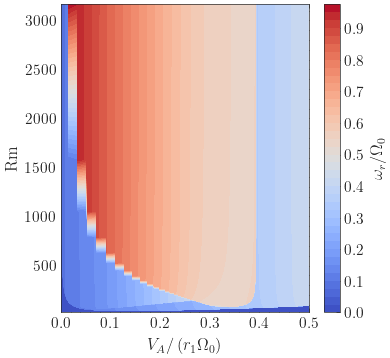

In [14]:
e11_ii = np.where(e11 <= 0)
e11[e11_ii[:]] = 0

### Take slices of maximum gr at given freq:
gr_ijk = np.zeros((1602, len(eta_arr)))
gr_ijk_ii = np.zeros((1602, len(eta_arr)))
freq_ijk = np.zeros((1602, len(eta_arr)))
for i in range(0,np.shape(e11)[0]):
    for j in range(0,np.shape(e11)[1]):
        for k in range(0,np.shape(e11)[2]):
            # gr_ijk[i,j] = e11[i,j,k]
            if(e11[i,j,k] > gr_ijk[i,j]):
                # gr_ijk[i,j] = e11[i,j,k]
                gr_ijk_ii[i,j] = k+1
                freq_ijk[i,j] = f11[i,j,k]
                if(freq_ijk[i,j] < 0.001):
                    freq_ijk[i,j] = 0
                # print(diff_modes[k])
                # print(k)
            
Rm = r1**2*Omega0/eta_arr

fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
fig.set_figheight(4)
fig.set_figwidth(4)

plt.contourf(VA_N_total, Rm, np.transpose((freq_ijk)),40, cmap ='coolwarm')
plt.ylabel(r'Rm')
plt.xlabel(r'$V_A/\left(r_1\Omega_0\right)$')
# Add a colorbar
cbar = plt.colorbar()
# Add a label to the colorbar
cbar.set_label(r'$\omega_r/\Omega_0$')
# plt.title(r'Dominant Mode at fixed Rm and $V_A$')
plt.xlim(0,0.5)
# plt.savefig('Rm-vA-Kep-3r1-freq-qmagpi.png', dpi = 400)
# plt.savefig('Rm-vA-Kep-3r1-freq-qmagpi.svg', format = 'svg')
plt.show()

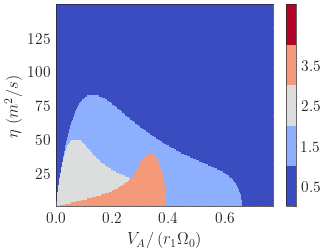

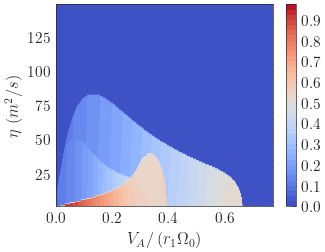

In [15]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
gr_ijk_ii_plot = np.transpose(gr_ijk_ii)

nticks = len(diff_modes) 
levels_arr = np.zeros(len(diff_modes)+1)
ticks_arr = np.zeros(len(diff_modes)+1)
for j in range(0, len(diff_modes)+1):
    ticks_arr[j] = j
    levels_arr[j] = j


ticks_arr = ticks_arr +0.5
levels = [0,1,2,3,4,5]
cmap = plt.colormaps['coolwarm']
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.figure()
contour = plt.pcolormesh(VA_N_total, eta_arr, gr_ijk_ii_plot, cmap=cmap, norm=norm)
# plt.contourf(VA_N_total, eta_arr, gr_ijk_ii_plot)
# cbar = plt.colorbar(im, ax=ax0)
cbar = plt.colorbar(contour,  ticks=ticks_arr)
# cbar.ax.set_yticklabels(['No Mode', r'MCI $1k_1$', r'MCI $2k_1$', r'MRI $1k_1$', r'MRI $2k_1$'])
plt.ylabel(r'$\eta$  $(m^2/s)$')
plt.xlabel(r'$V_A/\left(r_1\Omega_0\right)$')
plt.show()

plt.figure()
contour = plt.contourf(VA_N_total, eta_arr, np.transpose(freq_ijk), 40, cmap ='coolwarm')
cbar = plt.colorbar(contour)
plt.ylabel(r'$\eta$  $(m^2/s)$')
plt.xlabel(r'$V_A/\left(r_1\Omega_0\right)$')
plt.show()

In [16]:
j_mark = 0
k_mark = 0
gr_ii = np.where(gr_ijk_ii_plot == 1)
# print(gr_ii)
# print(np.where(gr_ii[0] == np.max(gr_ii[0])))
# print(gr_ii)

VA_N_total[gr_ii[1][:]]
# print(eta_arr[gr_ii[0][:]])
print(np.max((eta_arr[gr_ii[0][:]])))
jj = np.where(eta_arr[gr_ii[0][:]] == np.max(eta_arr[gr_ii[0][:]]))
# print(jj)
kk = VA_N_total[gr_ii[1][:]][jj[:]]
# print(kk)
# VAm = VA_N_total[jj[:]][0]
# VAm = VA_N_total[gr_ii[1][:]][jj[:]][0]
# VAm = VA_N_total[jj[:]][0]
VAm = kk[0]
print(VAm)
Rmm = r1**2*Omega0/np.max((eta_arr[gr_ii[0][:]]))
print(f'Minimum Rm: {Rmm}')

82
0.11278966074102202
Minimum Rm: 38.56436170937048


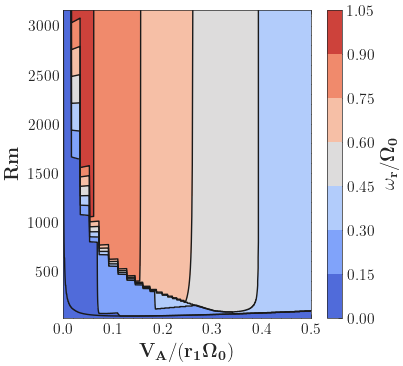

In [17]:
################ Zoom
cmap = 'coolwarm'
fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
ax2.set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2.set_ylabel(r'\textbf{Rm}', fontsize = 14)

fig.set_figheight(4)
fig.set_figwidth(4)


contour = plt.contourf(VA_N_total, Rm, np.transpose((freq_ijk)), 7, cmap=cmap)
cbar = plt.colorbar()
cbar.set_label(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 14)
plt.contour(contour, colors='k')

lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=2, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1)
plt.xlim(0, 0.5)
# plt.savefig('Rm-vA-Kep-3r1-freq-qmagpi.png', dpi = 400)
# plt.savefig('Rm-vA-Kep-3r1-freq-qmagpi.svg', format = 'svg')
plt.show()

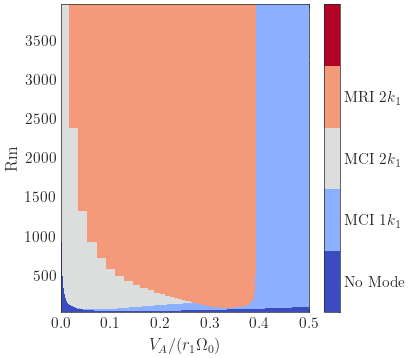

In [18]:
################ Zoom
# import seaborn
# seaborn.set_theme()
cmap = 'coolwarm'
fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
fig.set_figheight(4)
fig.set_figwidth(4)

levels = [0,1,2,3]

contour = plt.pcolormesh(VA_N_total, Rm, gr_ijk_ii_plot, cmap=cmap, norm=norm, rasterized=True)
tickss = np.array([0,1,2,3])+ 0.5
cbar = plt.colorbar(contour,  ticks=tickss) 
cbar.ax.set_yticklabels(['No Mode', r'MCI $1k_1$', r'MCI $2k_1$', r'MRI $2k_1$'])
lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=2, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1)
# plt.ylim(np.min(Rm), 250)
plt.xlim(0, 0.5)
# plt.savefig('Rm-vA-Kep-3r1-dommode-qmagpi-zoom.png', dpi = 400)
# plt.savefig('Rm-vA-Kep-3r1-dommode-qmagpi-zoom.svg', format = 'svg', dpi =300)
# plt.savefig('Rm-vA-Kep-dommode-qmagpi-zoom.pdf')

plt.show()

0.11278966074102202


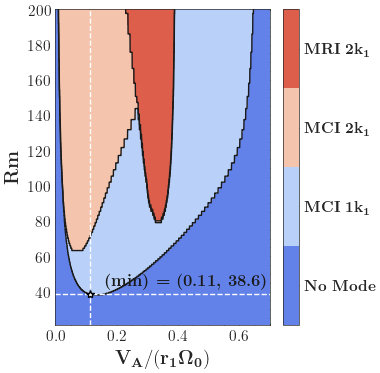

In [19]:
################ Zoom
# import seaborn
# seaborn.set_theme()
cmap = 'coolwarm'
fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
ax2.set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2.set_ylabel(r'\textbf{Rm}', fontsize = 14)
fig.set_figheight(4)
fig.set_figwidth(4)

levels = [0,1,2,3,4,5,6,7,8]

# contour = plt.pcolormesh(VA_N_total, Rm, gr_ijk_ii_plot, cmap=cmap, norm=norm, rasterized=True)
levels =np.array([0,1,2,3,4])
contour = plt.contourf(VA_N_total, Rm, gr_ijk_ii_plot+1., cmap=cmap, levels = levels)
plt.contour(contour, colors='k')

tickss = np.array([0,1,2,3])+ 0.5
cbar = plt.colorbar(contour,  ticks=tickss) 
cbar.ax.set_yticklabels([r'\textbf{No Mode}', r'\textbf{MCI} $\mathbf{1k_1}$', r'\textbf{MCI} $\mathbf{2k_1}$', r'\textbf{MRI} $\mathbf{2k_1}$'])
plt.axvline(x = VAm, color = 'w', linestyle = 'dashed')
plt.axhline(y = Rmm, color = 'w', linestyle = 'dashed')
plt.plot(VAm, Rmm, color = 'w', marker = '*', markeredgecolor='black')
# plt.text(VAm + 0.02, Rmm+5, f'(min) = {(np.round(VAm,1), np.round(Rmm, 1))}', fontsize=12, color='w', fontweight='bold')
plt.text(VAm + 0.05, Rmm+5, r'\textbf{(min) = (0.11, 38.6)}', fontsize=12, color='k', fontweight='bold')
print(VAm)
lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=2, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1)
plt.ylim(np.min(Rm), 200)
plt.xlim(0, 0.7)
plt.tight_layout()
plt.savefig('Rm-vA-Kep-dommode-qmagpi-zoom-qrcomp.pdf')

plt.show()

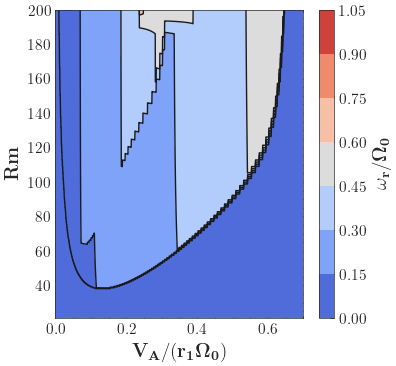

In [202]:
################ Zoom
cmap = 'coolwarm'
fig,ax2 = plt.subplots(1)
ax2.set(xlabel=r'$V_A/(r_1\Omega_0)$', ylabel=r"Rm")
ax2.set_xlabel(r'$\mathbf{V_A/(r_1\Omega_0)}$', fontsize = 14)
ax2.set_ylabel(r'\textbf{Rm}', fontsize = 14)

fig.set_figheight(4)
fig.set_figwidth(4)


contour = plt.contourf(VA_N_total, Rm, np.transpose((freq_ijk)), 7, cmap=cmap)
cbar = plt.colorbar()
cbar.set_label(r'$\mathbf{\omega_r/\Omega_0}$', fontsize = 14)
plt.contour(contour, colors='k')

lines_labels = [ax2.get_legend_handles_labels() for ax2 in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='lower center', ncol=2, 
#            bbox_to_anchor=(0.5, -0.15),  # Position the legend below the plot
#            frameon=False,  # Turn on the frame (border)
#            edgecolor='black',  # Set the border color
#            facecolor='white',  # Set the background color of the legend box
#            borderpad=1,  # Padding between the legend text and the border
#            borderaxespad=1)
plt.ylim(np.min(Rm), 200)
plt.xlim(0, 0.7)
# plt.savefig('Rm-vA-Kep-3r1-freq-qmagpi.png', dpi = 400)
# plt.savefig('Rm-vA-Kep-3r1-freq-qmagpi.svg', format = 'svg')
plt.show()